In [8]:
#I plot data from Shen and Bentz (soon)
import ROOT
from ROOT import *
from array import array
import math
from IPython.display import Image
from IPython.display import display
import numpy as np
import astropy
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo
import scipy
import matplotlib
import matplotlib.pyplot as plt

# Setting what to be shown in statistics box:
gStyle.SetOptStat(1110)   # Print for stat: Entries, Mean, and RMS
gStyle.SetOptFit(1111)    # Print for fit:  Everything!

gStyle.SetStatX(0.52);    # Top left corner.
gStyle.SetStatY(0.86);

r = TRandom3()
#---------------------------------------------------------------------------------
### Constants ###
        
c         = 299792458. #m/s
H0        = 2.23 *10.**(-18) # s^-1      = 69 (km/s)/Mpc
dH0       = 0.03 *10.**(-18) # s^-1      = 1 (km/s)/Mpc
L_sol     = 3.828*10**(26) # W

In [9]:
#----------------------------------------------------------------------
# Read data
#----------------------------------------------------------------------
### Bentz 13 part I ###
#name    z    D_L   dD   A_B

#f_lambda(5100*(1+z))

name_B          =[]
z_B             = array("f", [])
D_B             = array("f", [])
dD_B            = array("f", [])
A_B_B           = array("f", [])

with open( 'Bentz13zDA.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_B.append((line[0]))
        
        z_B.append(float(line[1]))
        
        D_B.append(float(line[2])*3.0857*10**22) #Mpc -> m
        dD_B.append(float(line[3])*3.0857*10**22)
        
        A_B_B.append(float(line[4]))
#---------------------------------------------------------------------------------
### Bentz 13 part II ###
#name/a    tau  +dtau   -dtau    F  dF    L   dL
# a=same name

#f_lambda(5100*(1+z))

#10^44 ergs s^-1

name_B2      = []
tau_B2       = array("f", [])
dtaup_B2     = array("f", [])
dtaum_B2     = array("f", [])
F_B2         = array("f", [])
dF_B2        = array("f", [])
L_B2         = array("f", [])
dL_B2        = array("f", [])

with open( 'Bentz13tauFL.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_B2.append((line[0]))
        
        tau_B2.append(float(line[1])*24*60*60) #days -> s
        dtaup_B2.append(float(line[2])*24*60*60)
        dtaum_B2.append(float(line[3])*24*60*60)
        
        F_B2.append(float(line[4])*10**(-8)) #10^-15 ergs s^-1 cm^-2 AA^-1 = 10^-15 *10^7 kg s^-3 m^-1
        dF_B2.append(float(line[5])*10**(-8))
        
        #Should be wrong - this is from the article
        #L_B2.append(float(line[6])*10**(37)/L_sol) #10^44 ergs s^-1 ->  10^44 * 10^-7 kg m^2 s^-3       
        #dL_B2.append(float(line[7])*10**(37)/L_sol)
        
        #Right way:
        #L_B2.append((10**(float(line[6])))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        #dL_B2.append((10**(float(line[7])))*10**(-7)/L_sol)
        
        #log:
        L_B2.append(float(line[6])) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        dL_B2.append(float(line[7]))
#---------------------------------------------------------------------------------
### Shen ###
#name    z    tau    dtau+    dtau-   F    dF    L    dL
# a=same name

#f_lambda(5100*(1+z))


name_S    = []
z_S       = array("f", [])
tau_S     = array("f", [])
dtaup_S   = array("f", [])
dtaum_S   = array("f", [])
F_S       = array("f", [])
dF_S      = array("f", [])
L_S       = array("f", [])
dL_S      = array("f", [])

with open( 'ShenSDSSztauFL.txt', 'r' ) as infile :
    for line in infile:
        line = line.strip().split()
        
        name_S.append((line[0]))
        
        z_S.append(float(line[1]))
        
        tau_S.append(float(line[2])*24*60*60)  #days -> s
        dtaup_S.append(float(line[3])*24*60*60) 
        dtaum_S.append(float(line[4])*24*60*60) 
        
        F_S.append(float(line[5])*10**(-10)) #10^-17 erg s^-1 cm^-2 AA^-1 =10^-17 *10^7 kg s^-3 m^-1 -> kg s^-3 m^-1
        dF_S.append(float(line[6])*10**(-10))
        
        #print float(line[7])
        
        #L_S.append(math.exp(float(line[7]))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=10^y
        #dL_S.append(math.exp(float(line[8]))*10**(-7)/L_sol)
        
        #Right way:
        #L_S.append((10**(float(line[7])))*10**(-7)/L_sol) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        #dL_S.append((10**(float(line[8])))*10**(-7)/L_sol)
        
        #log:
        L_S.append(float(line[7])) #log(erg s^-1)=log(10^-7 kg m^2 s^-3): log(x)=y -> x=exp(y)
        dL_S.append(float(line[8]))

        #Should be wrong:
        #L_S.append(float(line[7])*10**(37)/L_sol) #10^44 ergs s^-1 ->  10^44 * 10^-7 kg m^2 s^-3       
        #dL_S.append(float(line[8])*10**(37)/L_sol)

In [10]:
#--------------------------------------------------------------------------------
# Combining data
#--------------------------------------------------------------------------------
# PG1226+023 = PG1226+032 ???
# I renamed it 23

#z for each tau
z_B2 = array('f',[])
for i,x in enumerate(name_B2):
    i_name=name_B.index(x) #find index of name_B2 in name_B
    z_B2.append(z_B[i_name]) #use z for that index
    
print z_B2

#Shen + Bentz 2013
z     = np.array(z_S + z_B2) #Still an array

F     = np.array(F_S + F_B2)
dF    = np.array(dF_S + dF_B2)

L     = np.array(L_S + L_B2)
dL    = np.array(dL_S + dL_B2)

tau   = np.array(tau_S + tau_B2)
dtaum = np.array(dtaum_S + dtaum_B2)
dtaup = np.array(dtaup_S + dtaup_B2)

"""

NobsPerName=[name_B2.count(x) for x in name_B] #noget galt
print NobsPerName

z_B2=[]
for i in range(len(name_B)): 
    for j in range(NobsPerName[i]):
        z_B2.append(z_B[i])
print z_B2 
"""

array('f', [0.025790000334382057, 0.025790000334382057, 0.025790000334382057, 0.1420000046491623, 0.1550000011920929, 0.04701999947428703, 0.02638999931514263, 0.02638999931514263, 0.02638999931514263, 0.02638999931514263, 0.03300999850034714, 0.03300999850034714, 0.032710000872612, 0.032710000872612, 0.022190000861883163, 0.022190000861883163, 0.022190000861883163, 0.10000000149011612, 0.03528999909758568, 0.03528999909758568, 0.03528999909758568, 0.23409999907016754, 0.003860000055283308, 0.04493999853730202, 0.008840000256896019, 0.027869999408721924, 0.021090000867843628, 0.009730000048875809, 0.01955999992787838, 0.0023399998899549246, 0.0033199999015778303, 0.02102000080049038, 0.012930000200867653, 0.15834000706672668, 0.06300999969244003, 0.008999999612569809, 0.014630000106990337, 0.1550000011920929, 0.03044999949634075, 0.08959999680519104, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017179999500513077, 0.017

'\n\nNobsPerName=[name_B2.count(x) for x in name_B] #noget galt\nprint NobsPerName\n\nz_B2=[]\nfor i in range(len(name_B)): \n    for j in range(NobsPerName[i]):\n        z_B2.append(z_B[i])\nprint z_B2 \n'

In [11]:
#----------------------------------------------------------------------
# Analyse data
#----------------------------------------------------------------------
### tauF vs. z ###
    
# tauF vs. z
tauF          = tau/np.sqrt(F) #tau/sqrt(F)

#Slightly wrong uncertainties:
dtaumean      = (dtaum+dtaup)/2. #Mean of errors of each side
dtauF         = np.sqrt((1./F) * dtaumean**2. + (tau * F**(-3./2.) /2. )**2. * dF**2.)
test          = array('f', [math.sqrt(1./F[i] * dtaumean[i]**2 + (tau[i] * F[i]**(-3./2.) /2. )**2 * dF[i]**2) for i,x in enumerate(tau)] )
dz            = np.array([0.001]*len(z)) #That order of magnitude

print dtauF[0],test[0]

# ------- Monte Carlo --------- # 
# Assume gauss on each side
# I generate 2 gaussians and accept values on one side
# Combine

Npoints   = 1000
NegativeF = 0
dtauFm    = np.array([])
dtauFp    = np.array([])
Hist_SimTauF = TH1F("Hist_SimTauF", ";Simulated tau/sqrt(F) for i==15 ;Frequency", 500, -10, 10.)

for i in range(len(tau)) : #For all data
    simTauF = []
    Nhit    = 0
    while Nhit<0.5*Npoints: #Simulate many values of TauF (two each time)
        tauHigh = r.Gaus(tau[i],dtaup[i])
        tauLow  = r.Gaus(tau[i],dtaum[i])
        
        if tauHigh>tau[i] and tauLow<tau[i] : # Equal numbers of high and low - too much restriction?
            simF  = r.Gaus(F[i],dF[i]) #Or something with a possionian distribution?
            
            if simF>0: #math error if F<0
                simTauF.append(tauHigh/math.sqrt(simF))
            else:
                simTauF.append(tauHigh/0.00000000000001) #How do I avoid doing this?
                NegativeF += 1
            if i==15: Hist_SimTauF.Fill(simTauF[-1]) #Only one dataset and add latest value
            
            simF  = r.Gaus(F[i],dF[i]) #New F for the low tau. Necessary?
            if simF>0: 
                simTauF.append(tauLow/math.sqrt(simF))
            else:
                simTauF.append(tauLow/0.00000000000001) #How do I avoid doing this?
                NegativeF += 1
            if i==15: Hist_SimTauF.Fill(simTauF[-1])
            
            Nhit += 1
            
    # Find assymmetric uncertainties on tauF
    NotIn1sig       = (1 - 0.682689492137086)/2. # 1 sig from middle seen from lowest or highest = % not included in +- 1 sig from each side
    simTauF.sort()
    tauFLow  = simTauF[int(Npoints*NotIn1sig)]
    tauFHigh = simTauF[-int(Npoints*NotIn1sig)]
    
    # how different from actual tauF
    dtauFm   =np.append(dtauFm,tauF[i]-tauFLow)
    dtauFp   =np.append(dtauFp,tauFHigh-tauF[i])
    
    if i == 15: 
        print len(simTauF)
        
print len(dtauF),len(dtauFm),len(dtauFp)    
print "tauF[0]: ",tauF[0],"+-",dtauF[0], "+",dtauFp[0],"-",dtauFm[0]    
print "Number of negative simulated F: ", NegativeF            


#print "tauF:", tauF, "+-",dtauF
#print "z:", z, "+-",dz
#print "tau[0]: ",tau[0],"+-",dtaumean[0]

32840360852.3 32840359936.0


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: Hist_SimTauF (Potential memory leak).


1000
86 86 86
tauF[0]:  158583651135.0 +- 32840360852.3 + 44791874122.1 - 21610105283.7
Number of negative simulated F:  57


In [12]:
#-------------------------------------------------------------------------------------
### L vs. R ###
RBLR      = tau*c      #R=c*tau

dRBLRp    = dtaup*c  # dR=c*dtau
dRBLRm    = dtaum*c  # dR=c*dtau
#dRBLR     = array("f", [x*c for x in dtaumean])  # dR=c*dtau

print "RBLR:", RBLR[0], "+",dRBLRp[0], "+",dRBLRm[0]
print "L:", L[0], "+-",dL[0]


RBLR: 9.50605909223e+14 + 2.6938151106e+14 + 1.24329928182e+14
L: 44.3650016785 +- 0.0010000000475


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvasMC


laengder: 86 86 86 86


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas


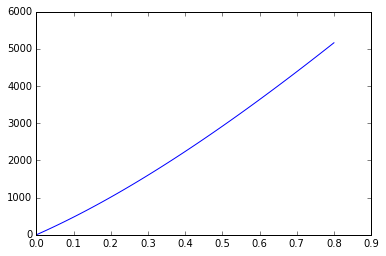

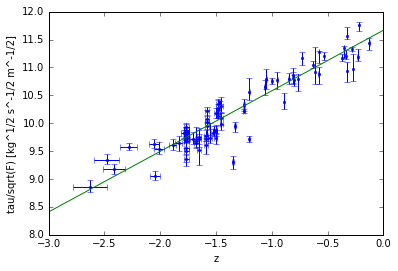

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canvas2


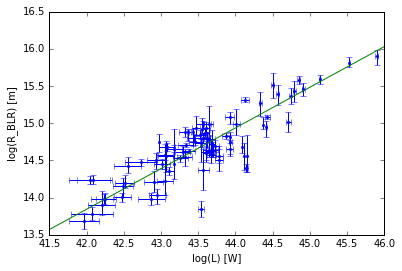

In [42]:
#----------------------------------------------------------------------
# Plot data
#----------------------------------------------------------------------
### Monte Carlo Simulation ###

canvasMC = TCanvas("canvasMC","", 50, 50, 600, 400)

Hist_SimTauF.Draw('AP')
canvasMC.Update()
canvasMC.Draw()

#canvasMC.SaveAs("Mont.png")

#---------------------------------------------------------------------------------

### tauFz ###
print "laengder:",len(tau), len(z), len(dz), len(dtauF)

logTauF   = np.log10(tauF)
dlogTauFp = np.log10(1+dtauFp/tauF)
dlogTauFm = np.log10(1+dtauFm/tauF)
logz      = np.log10(z)
dlogz     = np.log10(1+dz/z)


#Graph_tauFz = TGraphErrors(len(tau), z, tauF, dz, dtauF)
#Graph_tauFz = TGraphAsymmErrors(len(tau),z,tauF,dz,dz,dtauFm,dtauFp)
Graph_tauFz = TGraphAsymmErrors(len(tau),logz,logTauF,dlogz,dlogz,dlogTauFm,dlogTauFp)

canvas = TCanvas("canvas","All data", 50, 50, 600, 400)


fit = TF1("fit", "[0]+[1]*x" , -3, 0)
#fit.SetParameters(10.**9,10.**11)#10000., 0.1) #not log
fit.SetParameters(12,1)
fit.SetNpx(500) #good resolution
Graph_tauFz.Fit("fit", "R")

Graph_tauFz.GetXaxis().SetTitle("z")
Graph_tauFz.GetYaxis().SetTitle("tau/sqrt(F) [kg^1/2 s^-1/2 m^-1/2]") #[s^2.5*kg^-1/2]")
Graph_tauFz.SetTitle("")

Graph_tauFz.GetYaxis().SetTitleOffset(1.25)
Graph_tauFz.SetLineColor(kBlack)
Graph_tauFz.SetMarkerSize(0.5)
Graph_tauFz.SetMarkerStyle(20)

# Draw ROOT plot
Graph_tauFz.Draw('AP')
fit.Draw("same")
#canvas.Update()
canvas.Draw()
canvas.SaveAs("tauFz.png")

# Matplotlib plot
plt.figure()
z_cosmo = np.linspace(0.0,0.8,100)
DL      = cosmo.luminosity_distance(z_cosmo) #Fit with this somehow

%matplotlib inline
plt.plot(z_cosmo,DL.value) #Why does this one disappear?
plt.show()

plt.figure()
%matplotlib inline
plt.errorbar(logz, logTauF, yerr=[dlogTauFm,dlogTauFp], xerr=dlogz, linestyle='', fmt='.',markersize='5') #Remember m
p0        = fit.GetParameter(0)
p1        = fit.GetParameter(1)

logz_fit   = np.linspace(-3.0,0.0,100)
logtauF_fit   = p0 + p1*logz_fit
plt.plot(logz_fit,logtauF_fit)
plt.xlabel('z')
plt.ylabel('tau/sqrt(F) [kg^1/2 s^-1/2 m^-1/2]')

plt.show()


#---------------------------------------------------------------------------------
### R vs. L ###

logRBLR   = np.log10(RBLR)
dlogRBLRp = np.log10(1+dRBLRp/RBLR)
dlogRBLRm = np.log10(1+dRBLRm/RBLR)
logL      = np.log10(L)

#Graph_RL = TGraphErrors(len(L), L, RBLR, dL, dRBLR)
#Graph_RL = TGraphErrors(len(L), logL, logRBLR, logdL, dlogRBLR)
Graph_RL = TGraphAsymmErrors(len(L), L, logRBLR, dL, dL, dlogRBLRm,dlogRBLRm)


canvas2 = TCanvas("canvas2","", 50, 50, 600, 400)

#fitRL = TF1("fitRL", "[0]+[1]*exp(x)" , -10., 10.**(13))
fitRL = TF1("fitRL", "[0]+[1]*x" , -10., 10.**(13))
#fitRL = TF1("fitRL", "[0]+10.**13*x" , 0., 1.2*10**27)
#fitRL.SetParameter(0,10)
#fitRL.SetParameters(-15, 10.**(-11))#10.**(12), 10.**(-13)) #not log
fitRL.SetParameters(-9, 0.5)#10.**(12), 10.**(-13))
fitRL.SetNpx(500) #good resolution
Graph_RL.Fit("fitRL", "R")

Graph_RL.GetXaxis().SetTitle("log(L) [W]") #/L_sol")
Graph_RL.GetYaxis().SetTitle("log(R_BLR) [m]")
Graph_RL.SetTitle("")

Graph_RL.SetLineColor(kBlack)
Graph_RL.SetMarkerSize(0.5)
Graph_RL.SetMarkerStyle(20)

fitRL.Draw("same")
Graph_RL.Draw('AP')
canvas2.Update()
canvas2.SaveAs("RL.png")

# Matplotlib plot
plt.figure()

%matplotlib inline
plt.errorbar(L, logRBLR, yerr=[dlogRBLRm,dlogRBLRp], xerr=dL, linestyle='', fmt='.',markersize='5') #Remember m
p0           = fitRL.GetParameter(0)
p1           = fitRL.GetParameter(1)

L_fit        = np.linspace(41.5,46,100)
logRBLR_fit  = p0 + p1*L_fit
plt.plot(L_fit,logRBLR_fit)
plt.xlabel('log(L) [W]')
plt.ylabel('log(R_BLR) [m]')

plt.show()

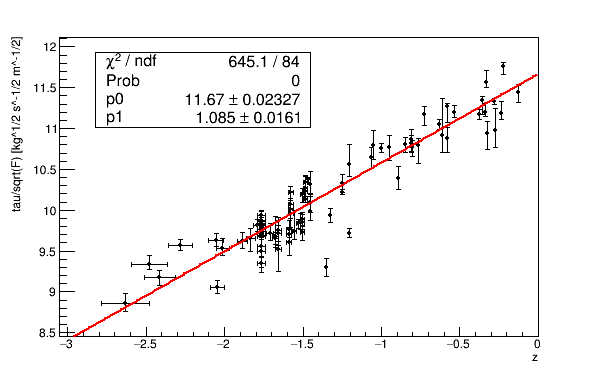

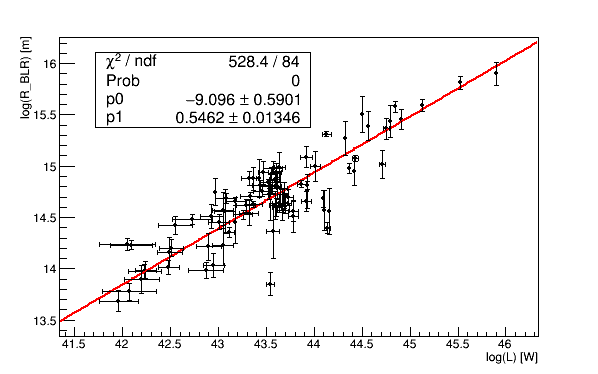

In [14]:
#Show plots

x = Image("tauFz.png") 
y = Image("RL.png") 
display(x,y)